## Sign-language-digits in Keras

Target: Create a classifier that can intepret sign language for number 0 to 9.

Source: https://github.com/ardamavi/Sign-Language-Digits-Dataset

In [1]:
# data manipulation
import numpy as np
import random

# read path
import os

# tools for machine learning in Python
from sklearn.model_selection import train_test_split

# high-level neural networks API - running on top of TensorFlow
import keras
# Sequential is a linear stack of layers
from keras.models import Sequential
# Dense, Flatten - type of layers, Dropout - tool, which decrease chance of overfitting
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# optimization 
from keras.optimizers import Adam, RMSprop, Adagrad, sgd
# preprocessing
from keras.preprocessing import image

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

# data visualisation, live training loss plot
import matplotlib.pyplot as plt
%matplotlib inline

# computer vision module
import cv2

# time module
import time

Using TensorFlow backend.


In [2]:
path = 'Sign-Language-Digits-Dataset/Dataset/'
classes = list(range(0,10))

X = []
y = []

for digit in classes:
    for img_file in os.listdir(path + str(digit)):
        img = cv2.imread(path + str(digit) + '/' + img_file)
        if type(img) == np.ndarray:
            X.append(cv2.resize(img,(64,64)))
            y.append(digit)

In [3]:
path = 'Sign-Language-Digits-Dataset/Examples/'

X_example = []
y_example = []

for img_file in os.listdir(path):
    img = cv2.imread(path + img_file)
    if type(img) == np.ndarray:
        X_example.append(cv2.resize(img,(64,64)))
        y_example.append(img_file)

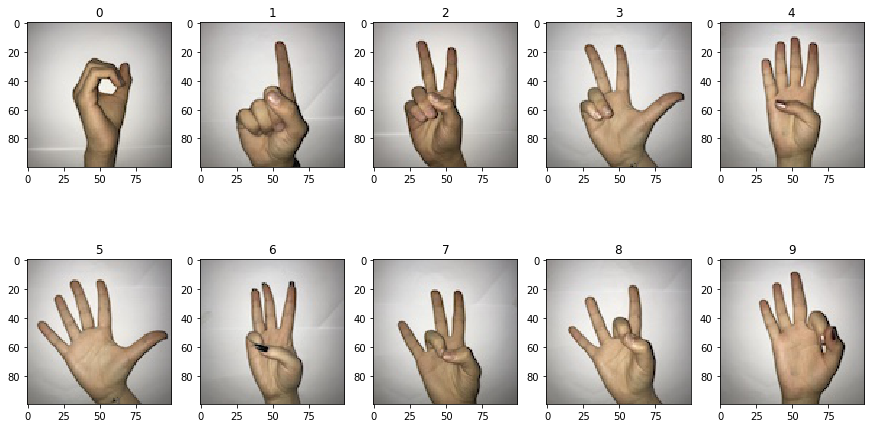

In [4]:
plt.rcParams['figure.figsize'] = (15, 8)
for index,im_index in enumerate(classes):
        img = image.load_img('Sign-Language-Digits-Dataset/Examples/example_' + str(im_index) + '.JPG')
        plt.subplot(2, 5, index + 1)
        plt.imshow(img)
        plt.title(index)
        img_index =+ 1

In [5]:
# preprocessing
X = np.array(X, dtype=np.float32) / 255
X_example = np.array(X_example, dtype=np.float32) / 255
y = np.array(y, np.uint8)
y = keras.utils.np_utils.to_categorical(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = int(time.time()))

In [7]:
def learning_curve(model_fit, key='acc', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.show()

In [8]:
def my_cnn():
    cnn = Sequential([
        Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Flatten(),
        
        Dense(256, activation = 'relu'),
        Dropout(0.5),
        Dense(10, activation = 'softmax')
    ])
    return cnn

model = my_cnn()
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [9]:
model_fit = model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 3s - loss: 2.3726 - acc: 0.0934 - val_loss: 2.3026 - val_acc: 0.0993
Epoch 2/15
 - 0s - loss: 2.3019 - acc: 0.1031 - val_loss: 2.3016 - val_acc: 0.0944
Epoch 3/15
 - 0s - loss: 2.2970 - acc: 0.1273 - val_loss: 2.2863 - val_acc: 0.1574
Epoch 4/15
 - 0s - loss: 2.2151 - acc: 0.2353 - val_loss: 1.9998 - val_acc: 0.4213
Epoch 5/15
 - 0s - loss: 1.6999 - acc: 0.4209 - val_loss: 1.0819 - val_acc: 0.6780
Epoch 6/15
 - 0s - loss: 1.1875 - acc: 0.5888 - val_loss: 0.7765 - val_acc: 0.7409
Epoch 7/15
 - 0s - loss: 0.9900 - acc: 0.6683 - val_loss: 0.7478 - val_acc: 0.7603
Epoch 8/15
 - 0s - loss: 0.8627 - acc: 0.7107 - val_loss: 0.5398 - val_acc: 0.8305
Epoch 9/15
 - 0s - loss: 0.7520 - acc: 0.7435 - val_loss: 0.4703 - val_acc: 0.8571
Epoch 10/15
 - 0s - loss: 0.6425 - acc: 0.7847 - val_loss: 0.4045 - val_acc: 0.8765
Epoch 11/15
 - 0s - loss: 0.5766 - acc: 0.8181 - val_loss: 0.3877 - val_ac

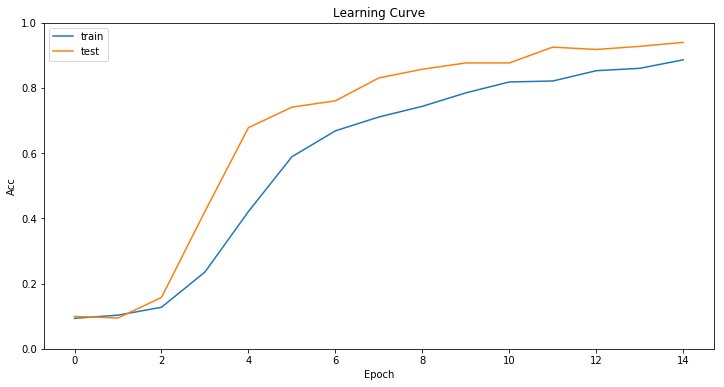

In [10]:
learning_curve(model_fit, key='acc', ylim=(0, 1))

In [11]:
result = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100- result[1]*100))

Accuracy:  0.9394673126373106
Error: 6.05%


In [12]:
y_example_pred = model.predict(X_example)

In [13]:
for index, probability in enumerate(y_example_pred):
    print('{}: {}'.format(y_example[index],np.argmax(probability)))

example_4.JPG: 6
example_3.JPG: 3
example_2.JPG: 2
example_5.JPG: 5
example_8.JPG: 8
example_6.JPG: 6
example_1.JPG: 1
example_0.JPG: 0
example_7.JPG: 7
example_9.JPG: 9


In [14]:
def my_cnn_1():
    cnn = Sequential([
        Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
        Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Flatten(),
        
        Dense(512, activation = 'relu'),
        Dropout(0.5),
        Dense(256, activation = 'relu'),
        Dropout(0.5),
        Dense(10, activation = 'softmax')
    ])
    return cnn

model_1 = my_cnn_1()
model_1.summary()
model_1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [15]:
model_fit_1 = model_1.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 2s - loss: 2.3104 - acc: 0.0904 - val_loss: 2.3028 - val_acc: 0.0896
Epoch 2/15
 - 0s - loss: 2.3030 - acc: 0.0891 - val_loss: 2.3037 - val_acc: 0.0847
Epoch 3/15
 - 0s - loss: 2.3024 - acc: 0.0964 - val_loss: 2.3041 - val_acc: 0.0847
Epoch 4/15
 - 0s - loss: 2.3022 - acc: 0.1043 - val_loss: 2.3047 - val_acc: 0.0847
Epoch 5/15
 - 0s - loss: 2.3028 - acc: 0.1092 - val_loss: 2.3052 - val_acc: 0.0847
Epoch 6/15
 - 0s - loss: 2.3023 - acc: 0.1013 - val_loss: 2.3050 - val_acc: 0.0847
Epoch 7/15
 - 0s - loss: 2.3027 - acc: 0.0995 - val_loss: 2.3052 - val_acc: 0.0847
Epoch 8/15
 - 0s - loss: 2.3021 - acc: 0.1098 - val_loss: 2.3055 - val_acc: 0.0847
Epoch 9/15
 - 0s - loss: 2.3026 - acc: 0.0916 - val_loss: 2.3055 - val_acc: 0.0847
Epoch 10/15
 - 0s - loss: 2.3027 - acc: 0.0964 - val_loss: 2.3054 - val_acc: 0.0847
Epoch 11/15
 - 0s - loss: 2.3024 - acc: 0.1043 - val_loss: 2.3055 - val_acc: 0.0847
Epoch 12/15
 - 0s - loss: 2.3029 - acc

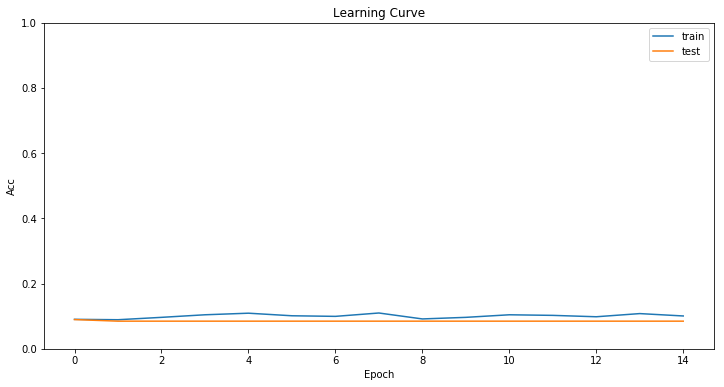

In [16]:
learning_curve(model_fit_1, key='acc', ylim=(0, 1))

In [17]:
result = model_1.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100 - result[1]*100))

Accuracy:  0.08474576269382426
Error: 91.53%


In [18]:
def my_cnn_2():
    cnn = Sequential([
        Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
        Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.25),
        
        Flatten(),
        
        Dense(256, activation = 'relu'),
        Dropout(0.5),
        Dense(124, activation = 'relu'),
        Dropout(0.5),
        Dense(10, activation = 'softmax')
    ])
    return cnn

model_2 = my_cnn_2()
model_2.summary()
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [19]:
model_fit_2 = model_2.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 1s - loss: 2.3156 - acc: 0.0995 - val_loss: 2.3025 - val_acc: 0.0944
Epoch 2/15
 - 0s - loss: 2.3014 - acc: 0.1025 - val_loss: 2.2979 - val_acc: 0.0872
Epoch 3/15
 - 0s - loss: 2.2951 - acc: 0.1049 - val_loss: 2.2795 - val_acc: 0.0969
Epoch 4/15
 - 0s - loss: 2.1739 - acc: 0.1965 - val_loss: 1.8595 - val_acc: 0.4310
Epoch 5/15
 - 0s - loss: 1.8290 - acc: 0.3317 - val_loss: 1.1207 - val_acc: 0.6247
Epoch 6/15
 - 0s - loss: 1.4242 - acc: 0.4924 - val_loss: 0.9087 - val_acc: 0.7337
Epoch 7/15
 - 0s - loss: 1.1866 - acc: 0.5743 - val_loss: 0.6638 - val_acc: 0.8039
Epoch 8/15
 - 0s - loss: 0.9888 - acc: 0.6628 - val_loss: 0.5926 - val_acc: 0.8136
Epoch 9/15
 - 0s - loss: 0.8399 - acc: 0.7071 - val_loss: 0.4276 - val_acc: 0.8692
Epoch 10/15
 - 0s - loss: 0.7557 - acc: 0.7483 - val_loss: 0.4289 - val_acc: 0.8789
Epoch 11/15
 - 0s - loss: 0.6431 - acc: 0.7878 - val_loss: 0.3512 - val_acc: 0.8862
Epoch 12/15
 - 0s - loss: 0.5694 - acc

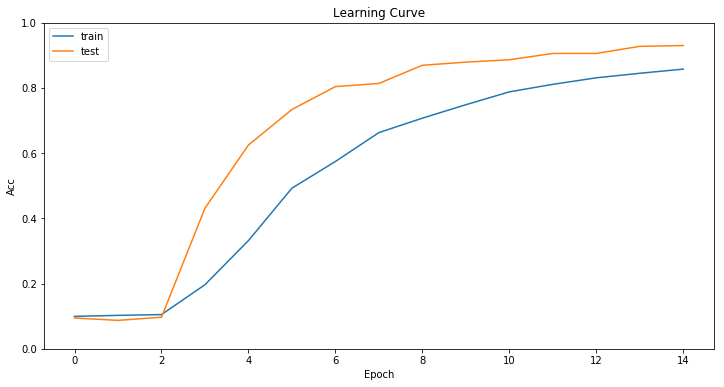

In [20]:
learning_curve(model_fit_2, key='acc', ylim=(0, 1))

In [21]:
result = model_2.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100- result[1]*100))

Accuracy:  0.929782081314207
Error: 7.02%


In [22]:
def my_cnn_3():
    cnn = Sequential([
        Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (64, 64, 3)),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.1),
        
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.1),
        
        Flatten(),
        
        Dense(124, activation = 'relu'),
        Dropout(0.25),
        Dense(10, activation = 'softmax')
    ])
    return cnn

In [23]:
model_3 = my_cnn_3()
model_3.summary()
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16384)             0         
__________

In [24]:
model_fit_3 = model_3.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 1s - loss: 2.3996 - acc: 0.1243 - val_loss: 2.2878 - val_acc: 0.1719
Epoch 2/15
 - 0s - loss: 2.2483 - acc: 0.1922 - val_loss: 2.1546 - val_acc: 0.4019
Epoch 3/15
 - 0s - loss: 1.9920 - acc: 0.3711 - val_loss: 1.7418 - val_acc: 0.4818
Epoch 4/15
 - 0s - loss: 1.5055 - acc: 0.5100 - val_loss: 1.1812 - val_acc: 0.6659
Epoch 5/15
 - 0s - loss: 1.1385 - acc: 0.6337 - val_loss: 0.8389 - val_acc: 0.7433
Epoch 6/15
 - 0s - loss: 0.9240 - acc: 0.6907 - val_loss: 0.6797 - val_acc: 0.7893
Epoch 7/15
 - 0s - loss: 0.7932 - acc: 0.7380 - val_loss: 0.6079 - val_acc: 0.7918
Epoch 8/15
 - 0s - loss: 0.7119 - acc: 0.7562 - val_loss: 0.5449 - val_acc: 0.8087
Epoch 9/15
 - 0s - loss: 0.6248 - acc: 0.7962 - val_loss: 0.4832 - val_acc: 0.8523
Epoch 10/15
 - 0s - loss: 0.5926 - acc: 0.8011 - val_loss: 0.4802 - val_acc: 0.8620
Epoch 11/15
 - 0s - loss: 0.5478 - acc: 0.8205 - val_loss: 0.4476 - val_acc: 0.8523
Epoch 12/15
 - 0s - loss: 0.4979 - acc

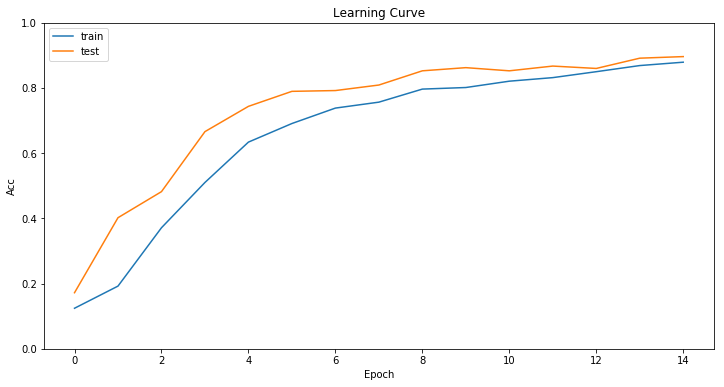

In [25]:
learning_curve(model_fit_3, key='acc', ylim=(0, 1))

In [26]:
result = model_3.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100 - result[1]*100))

Accuracy:  0.8958837791158847
Error: 10.41%


### Diferrent optimizer

In [27]:
model_4 = my_cnn_3()
model_4.summary()
model_4.compile(loss = 'categorical_crossentropy', optimizer = 'sgd' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
__________

In [28]:
model_fit_4 = model_4.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 1s - loss: 2.3234 - acc: 0.0837 - val_loss: 2.3043 - val_acc: 0.0969
Epoch 2/15
 - 0s - loss: 2.3009 - acc: 0.1176 - val_loss: 2.2917 - val_acc: 0.1574
Epoch 3/15
 - 0s - loss: 2.2902 - acc: 0.1219 - val_loss: 2.2884 - val_acc: 0.1211
Epoch 4/15
 - 0s - loss: 2.2876 - acc: 0.1249 - val_loss: 2.2792 - val_acc: 0.2324
Epoch 5/15
 - 0s - loss: 2.2822 - acc: 0.1431 - val_loss: 2.2784 - val_acc: 0.1404
Epoch 6/15
 - 0s - loss: 2.2724 - acc: 0.1431 - val_loss: 2.2702 - val_acc: 0.1477
Epoch 7/15
 - 0s - loss: 2.2625 - acc: 0.1649 - val_loss: 2.2596 - val_acc: 0.2446
Epoch 8/15
 - 0s - loss: 2.2479 - acc: 0.1819 - val_loss: 2.2414 - val_acc: 0.2760
Epoch 9/15
 - 0s - loss: 2.2439 - acc: 0.1813 - val_loss: 2.2413 - val_acc: 0.1937
Epoch 10/15
 - 0s - loss: 2.2258 - acc: 0.1856 - val_loss: 2.2162 - val_acc: 0.2107
Epoch 11/15
 - 0s - loss: 2.2009 - acc: 0.2135 - val_loss: 2.1909 - val_acc: 0.3680
Epoch 12/15
 - 0s - loss: 2.1836 - acc

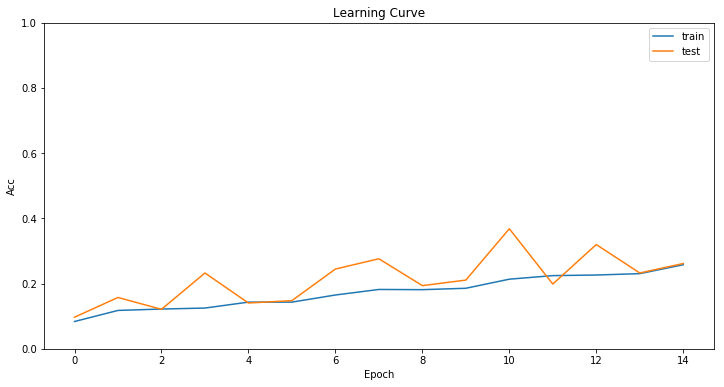

In [29]:
learning_curve(model_fit_4, key='acc', ylim=(0, 1))

In [30]:
result = model_4.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100 - result[1]*100))

Accuracy:  0.2615012105815924
Error: 73.85%


In [31]:
model_5 = my_cnn_3()
model_5.summary()
model_5.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16384)             0         
__________

In [32]:
model_fit_5 = model_5.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 1s - loss: 3.2946 - acc: 0.0928 - val_loss: 2.2940 - val_acc: 0.1695
Epoch 2/15
 - 0s - loss: 2.2492 - acc: 0.1704 - val_loss: 2.1202 - val_acc: 0.2688
Epoch 3/15
 - 0s - loss: 1.9835 - acc: 0.3414 - val_loss: 1.6503 - val_acc: 0.4237
Epoch 4/15
 - 0s - loss: 1.5979 - acc: 0.4779 - val_loss: 1.1290 - val_acc: 0.7240
Epoch 5/15
 - 0s - loss: 1.2175 - acc: 0.5955 - val_loss: 1.0223 - val_acc: 0.6538
Epoch 6/15
 - 0s - loss: 1.0682 - acc: 0.6422 - val_loss: 0.7806 - val_acc: 0.7676
Epoch 7/15
 - 0s - loss: 0.9014 - acc: 0.7132 - val_loss: 0.6733 - val_acc: 0.7772
Epoch 8/15
 - 0s - loss: 0.8299 - acc: 0.7204 - val_loss: 0.5692 - val_acc: 0.8039
Epoch 9/15
 - 0s - loss: 0.7239 - acc: 0.7495 - val_loss: 0.5019 - val_acc: 0.8450
Epoch 10/15
 - 0s - loss: 0.6478 - acc: 0.7823 - val_loss: 0.5332 - val_acc: 0.8402
Epoch 11/15
 - 0s - loss: 0.5977 - acc: 0.8041 - val_loss: 0.4720 - val_acc: 0.8354
Epoch 12/15
 - 0s - loss: 0.5458 - acc

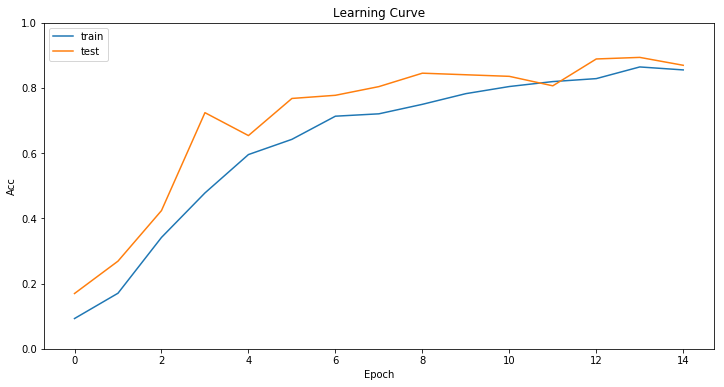

In [33]:
learning_curve(model_fit_5, key='acc', ylim=(0, 1))

In [34]:
result = model_5.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100 - result[1]*100))

Accuracy:  0.8692493936628752
Error: 13.08%


In [35]:
model_6 = my_cnn_3()
model_6.summary()
model_6.compile(loss = 'categorical_crossentropy', optimizer = 'Adagrad' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)             0         
__________

In [36]:
model_fit_6 = model_6.fit(X_train, y_train,
          batch_size = 128,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 1s - loss: 3.8305 - acc: 0.1019 - val_loss: 2.2920 - val_acc: 0.1429
Epoch 2/15
 - 0s - loss: 2.2822 - acc: 0.1413 - val_loss: 2.2276 - val_acc: 0.3414
Epoch 3/15
 - 0s - loss: 2.1741 - acc: 0.2638 - val_loss: 2.1000 - val_acc: 0.4600
Epoch 4/15
 - 0s - loss: 1.8029 - acc: 0.4203 - val_loss: 1.2978 - val_acc: 0.6295
Epoch 5/15
 - 0s - loss: 1.3932 - acc: 0.5428 - val_loss: 1.0436 - val_acc: 0.7312
Epoch 6/15
 - 0s - loss: 1.0336 - acc: 0.6689 - val_loss: 0.8372 - val_acc: 0.7603
Epoch 7/15
 - 0s - loss: 0.8945 - acc: 0.7041 - val_loss: 0.6837 - val_acc: 0.7990
Epoch 8/15
 - 0s - loss: 0.8015 - acc: 0.7483 - val_loss: 0.5842 - val_acc: 0.8305
Epoch 9/15
 - 0s - loss: 0.6807 - acc: 0.7653 - val_loss: 0.5209 - val_acc: 0.8402
Epoch 10/15
 - 0s - loss: 0.6518 - acc: 0.7920 - val_loss: 0.5369 - val_acc: 0.8305
Epoch 11/15
 - 0s - loss: 0.5675 - acc: 0.8163 - val_loss: 0.4479 - val_acc: 0.8620
Epoch 12/15
 - 0s - loss: 0.5165 - acc

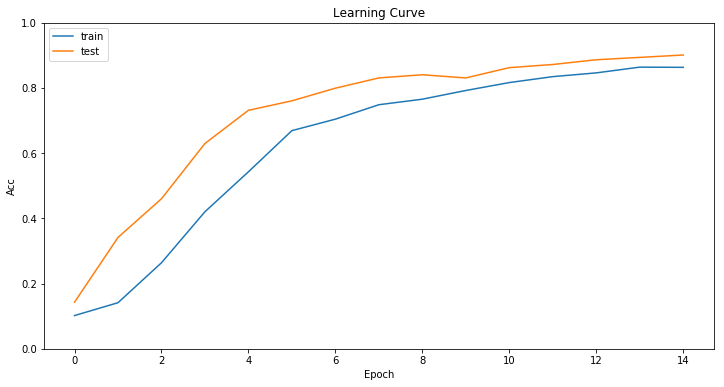

In [37]:
learning_curve(model_fit_6, key='acc', ylim=(0, 1))

In [38]:
result = model_6.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100 - result[1]*100))

Accuracy:  0.9007263912415677
Error: 9.93%


### Diferrent amount of epoch

In [39]:
model_7 = my_cnn_3()
model_7.summary()
model_7.compile(loss = 'categorical_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16384)             0         
__________

In [40]:
model_fit_7 = model_7.fit(X_train, y_train,
          batch_size = 128,
          epochs = 2,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/2
 - 1s - loss: 2.4266 - acc: 0.0988 - val_loss: 2.3028 - val_acc: 0.0823
Epoch 2/2
 - 0s - loss: 2.2824 - acc: 0.1716 - val_loss: 2.2426 - val_acc: 0.2203


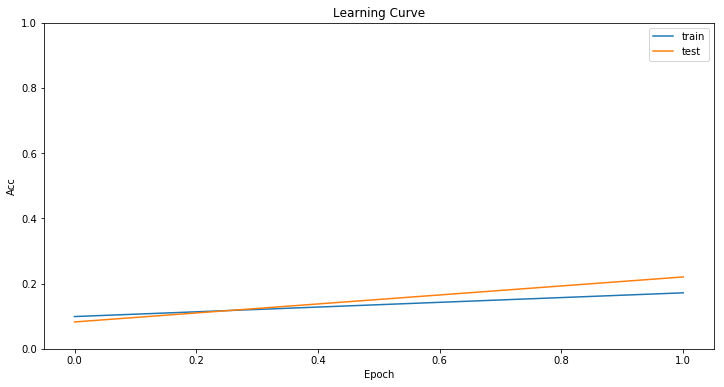

In [41]:
learning_curve(model_fit_7, key='acc', ylim=(0, 1))

In [42]:
result = model_7.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: ', result[1])
print('Error: %.2f%%' % (100 - result[1]*100))

Accuracy:  0.22033898301476718
Error: 77.97%


In [43]:
model_fit_8 = model_7.fit(X_train, y_train,
          batch_size = 128,
          epochs = 200,
          verbose = 0,
          validation_data = (X_test, y_test));

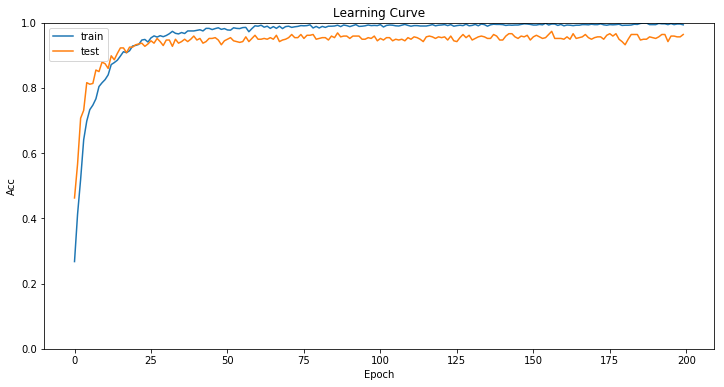

In [44]:
learning_curve(model_fit_8, key='acc', ylim=(0, 1))

### Diferrent amount of batch size

In [45]:
model_fit_9 = model_7.fit(X_train, y_train,
          batch_size = 8,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 1s - loss: 0.3452 - acc: 0.8890 - val_loss: 0.2689 - val_acc: 0.8959
Epoch 2/15
 - 1s - loss: 0.1504 - acc: 0.9515 - val_loss: 0.2533 - val_acc: 0.9249
Epoch 3/15
 - 1s - loss: 0.1143 - acc: 0.9582 - val_loss: 0.2259 - val_acc: 0.9395
Epoch 4/15
 - 1s - loss: 0.0803 - acc: 0.9721 - val_loss: 0.2164 - val_acc: 0.9467
Epoch 5/15
 - 1s - loss: 0.0925 - acc: 0.9648 - val_loss: 0.2149 - val_acc: 0.9443
Epoch 6/15
 - 1s - loss: 0.0782 - acc: 0.9770 - val_loss: 0.2134 - val_acc: 0.9467
Epoch 7/15
 - 1s - loss: 0.0657 - acc: 0.9739 - val_loss: 0.2210 - val_acc: 0.9443
Epoch 8/15
 - 1s - loss: 0.0739 - acc: 0.9757 - val_loss: 0.2283 - val_acc: 0.9467
Epoch 9/15
 - 1s - loss: 0.0665 - acc: 0.9739 - val_loss: 0.2008 - val_acc: 0.9443
Epoch 10/15
 - 1s - loss: 0.0466 - acc: 0.9848 - val_loss: 0.2318 - val_acc: 0.9225
Epoch 11/15
 - 1s - loss: 0.0408 - acc: 0.9836 - val_loss: 0.2208 - val_acc: 0.9395
Epoch 12/15
 - 1s - loss: 0.0348 - acc

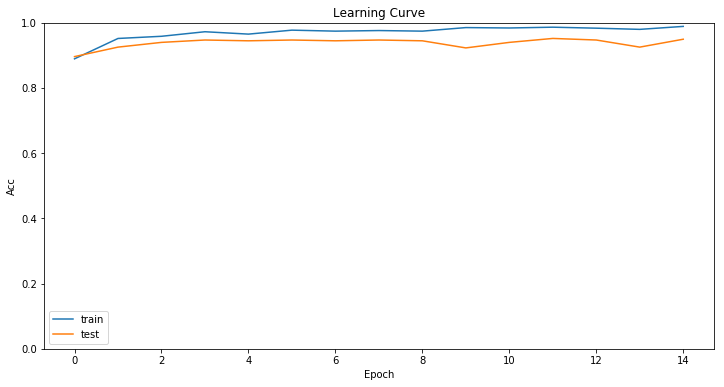

In [46]:
learning_curve(model_fit_9, key='acc', ylim=(0, 1))

In [47]:
model_fit_10 = model_7.fit(X_train, y_train,
          batch_size = 1024,
          epochs = 15,
          verbose = 2,
          validation_data = (X_test, y_test));

Train on 1649 samples, validate on 413 samples
Epoch 1/15
 - 2s - loss: 0.0606 - acc: 0.9757 - val_loss: 0.2241 - val_acc: 0.9516
Epoch 2/15
 - 0s - loss: 0.0423 - acc: 0.9867 - val_loss: 0.2233 - val_acc: 0.9516
Epoch 3/15
 - 0s - loss: 0.0480 - acc: 0.9842 - val_loss: 0.2224 - val_acc: 0.9540
Epoch 4/15
 - 0s - loss: 0.0391 - acc: 0.9854 - val_loss: 0.2218 - val_acc: 0.9540
Epoch 5/15
 - 0s - loss: 0.0421 - acc: 0.9854 - val_loss: 0.2213 - val_acc: 0.9540
Epoch 6/15
 - 0s - loss: 0.0397 - acc: 0.9842 - val_loss: 0.2211 - val_acc: 0.9564
Epoch 7/15
 - 0s - loss: 0.0363 - acc: 0.9867 - val_loss: 0.2209 - val_acc: 0.9564
Epoch 8/15
 - 0s - loss: 0.0171 - acc: 0.9945 - val_loss: 0.2211 - val_acc: 0.9564
Epoch 9/15
 - 0s - loss: 0.0328 - acc: 0.9891 - val_loss: 0.2207 - val_acc: 0.9564
Epoch 10/15
 - 0s - loss: 0.0244 - acc: 0.9903 - val_loss: 0.2204 - val_acc: 0.9540
Epoch 11/15
 - 0s - loss: 0.0262 - acc: 0.9933 - val_loss: 0.2199 - val_acc: 0.9564
Epoch 12/15
 - 0s - loss: 0.0216 - acc

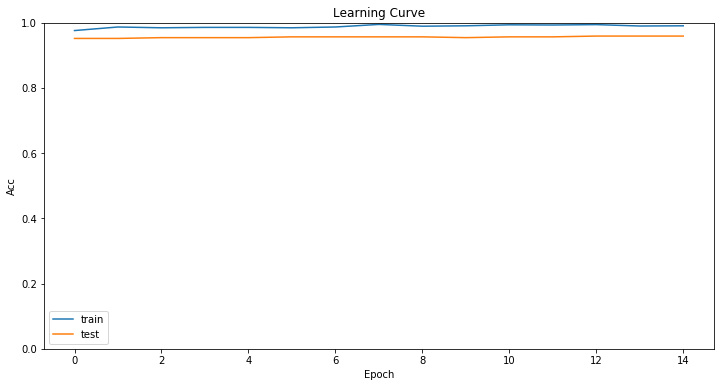

In [48]:
learning_curve(model_fit_10, key='acc', ylim=(0, 1))

In [49]:
# where I have a mistake? 

y_pred = model.predict(X_test, verbose=0)

def error_predict(y_test, y_pred):
    for idx, (a, b) in enumerate(zip(y_test, y_pred)):
        if np.argmax(a) == np.argmax(b): continue
        yield idx, np.argmax(a), tuple(np.argsort(b)[-2:])
        
def display_errors():
    random_errors = random.sample(list(error_predict(y_test, y_pred)), 12)
    plt.figure(figsize=(10, 10))

    for index, (im_index, y_test_val, (y_pred_2, y_pred_1)) in enumerate(random_errors):
            plt.subplot(4,4,index+1)
            plt.imshow(X_test[im_index], cmap='ocean', interpolation='none')
            plt.title('True value: {0}\nFirst predicted: {1}\nSecond predicted: {2}'.format(y_test_val, y_pred_1, y_pred_2))
            plt.tight_layout()

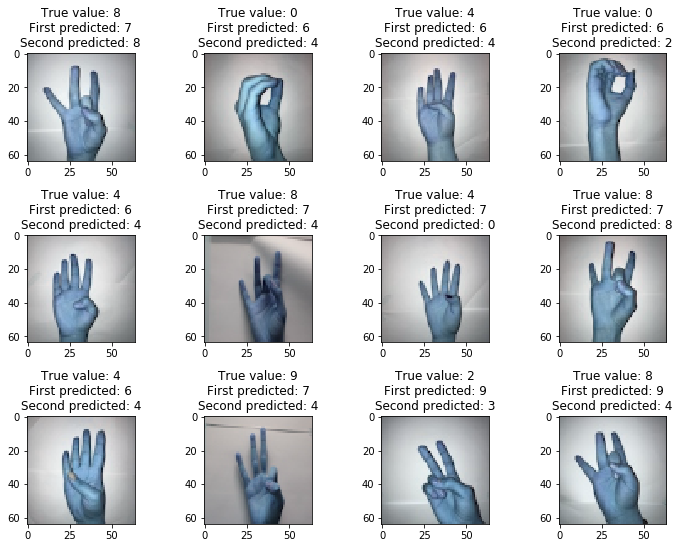

In [50]:
display_errors()